# <font color='blue'>Deep Learning II</font>

# Recurrent Neural Networks

Redes Neurais Recorrentes ou RNNs são um tipo especial de rede neural projetada para problemas sequenciais. Considerando uma rede padrão Multilayer Perceptron, uma rede neural recorrente pode ser pensada como a adição de loops à arquitetura. Por exemplo, em uma dada camada, cada neurônio pode passar seu sinal para frente (feed-forward) e também para o lado. 

Uma Rede Neural Recorrente é basicamente uma rede neural que pode ser usada quando seus dados são tratados como uma sequência, onde a ordem particular dos pontos de dados é importante e esta sequência pode ser de comprimento arbitrário.

O exemplo mais claro é talvez uma série temporal de números, onde a tarefa é prever o próximo valor de acordo com valores anteriores. A entrada para a RNN em cada passo de tempo é o valor atual, bem como um vetor de estado que representa o que a rede "viu" no tempo - etapas anteriores. Este estado-vetor é a memória codificada da RNN, inicialmente definida como zero.

## Prevendo Séries Temporais com Multilayer Perceptron


Previsão de arrecadação de ICMS.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram a arrecadação de ICMS. Os dados tem registros dos anos de 2010 a 2015.

Será fornecido 1 dataset com 2 colunas, data e arrecadação de icms. 

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
import keras as k
k.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
# Imports
import math
import pandas
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Imports para visualização de dados
import matplotlib as m

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
# Random seed 
numpy.random.seed(7)

In [5]:
# Carregando os dados
# Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
# pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
# carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
# com informações que podemos excluir com o argumento skipfooter para pandas.read_csv() 
# Uma vez carregado, podemos plotar facilmente todo o conjunto de dados. 

dataframe = pandas.read_csv("Arrecadacao_icms.csv", usecols = [1], engine = 'python')
dataset = dataframe.values
dataset = dataset.astype('float32')

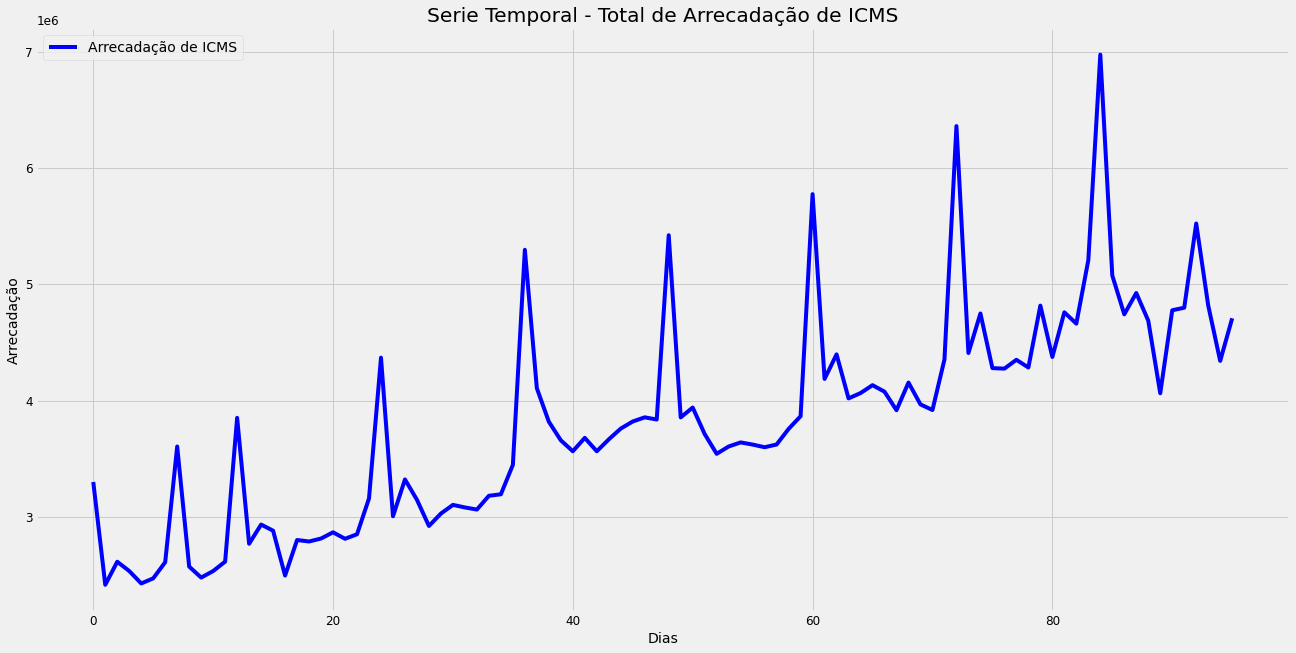

In [6]:
# Plot
plt.title("Serie Temporal - Total de Arrecadação de ICMS")
plt.plot(dataset, label = "Arrecadação de ICMS", color = 'blue')
plt.xlabel("Dias")
plt.ylabel("Arrecadação")
plt.legend(loc = "best")

In [7]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

72 24


In [8]:
# Agora podemos definir uma função para criar um novo conjunto de dados como descrito acima. A função
# recebe 2 argumentos: o conjunto de dados, que é um array NumPy que queremos converter em um dataset e
# look back que é o número de etapas de tempo anteriores para usar como variáveis de entrada para prever
# O próximo período de tempo, neste caso, definido como 1. Esse padrão criará um conjunto de dados onde X é
# o número de passageiros em um determinado momento (t) e Y é o número de passageiros no próximo
# momento (t + 1). 
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
# Reshape em X = t e Y = t + 1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Imprimindo dataset de treino
#print(trainX[0:2], trainY[0:2])

# Imprimindo dataset original
#print("\n", dataset[0:3])

In [10]:
# Cria o modelo MLP - RNA - com 1 input, 1 camada oculta com 8 neurônios e uma camada de saída
model = Sequential()

# Camada oculta
model.add(Dense(8, input_dim = look_back, activation = 'relu'))

# Camada de saída
model.add(Dense(1))

# Compilação
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit do modelo
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
 - 0s - loss: 11842125711652.5703
Epoch 2/200
 - 0s - loss: 10732018028661.0273
Epoch 3/200
 - 0s - loss: 9624789765324.8008
Epoch 4/200
 - 0s - loss: 8489823251426.7432
Epoch 5/200
 - 0s - loss: 7307007877822.1719
Epoch 6/200
 - 0s - loss: 6164712806341.4863
Epoch 7/200
 - 0s - loss: 5038452162091.8857
Epoch 8/200
 - 0s - loss: 4028018672084.1147
Epoch 9/200
 - 0s - loss: 3106750535153.3716
Epoch 10/200
 - 0s - loss: 2341085502317.7144
Epoch 11/200
 - 0s - loss: 1715874412251.4287
Epoch 12/200
 - 0s - loss: 1252723637716.1143
Epoch 13/200
 - 0s - loss: 924984258911.0857
Epoch 14/200
 - 0s - loss: 695042994527.0857
Epoch 15/200
 - 0s - loss: 552940310176.9143
Epoch 16/200
 - 0s - loss: 468658068977.3714
Epoch 17/200
 - 0s - loss: 427686722940.3429
Epoch 18/200
 - 0s - loss: 395719886511.5428
Epoch 19/200
 - 0s - loss: 386047736170.0571
Epoch 20/200
 - 0s - loss: 379198319469.7143
Epoch 21/200
 - 0s - loss: 376226291682.7429
Epoch 22/200
 - 0s - loss: 374381126122.0571
Epoch

Epoch 182/200
 - 0s - loss: 375803915900.3429
Epoch 183/200
 - 0s - loss: 376191119604.1143
Epoch 184/200
 - 0s - loss: 373810390154.9714
Epoch 185/200
 - 0s - loss: 373736287612.3429
Epoch 186/200
 - 0s - loss: 374166834232.6857
Epoch 187/200
 - 0s - loss: 379745809821.2571
Epoch 188/200
 - 0s - loss: 374217326350.6286
Epoch 189/200
 - 0s - loss: 374599406047.0857
Epoch 190/200
 - 0s - loss: 373825401309.2571
Epoch 191/200
 - 0s - loss: 374746915811.6571
Epoch 192/200
 - 0s - loss: 374310974404.5715
Epoch 193/200
 - 0s - loss: 374882674585.6000
Epoch 194/200
 - 0s - loss: 375102103455.0857
Epoch 195/200
 - 0s - loss: 373783505683.2000
Epoch 196/200
 - 0s - loss: 374160001411.6571
Epoch 197/200
 - 0s - loss: 375133682589.2571
Epoch 198/200
 - 0s - loss: 378674378247.3143
Epoch 199/200
 - 0s - loss: 375525074077.2571
Epoch 200/200
 - 0s - loss: 377623902983.3143


In [11]:
# Estima a performance do modelo
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um
# erro médio no conjunto de dados de treinamento e no conjunto de dados de teste.

trainScore = model.evaluate(trainX, trainY, verbose = 0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 372616559996.3428 MSE (610423.2630 RMSE)
Score em Teste: 632651579392.0000 MSE (795393.9775 RMSE)


In [12]:
# Gera previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
# Ajusta os dados de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [14]:
# Ajusta os dados de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

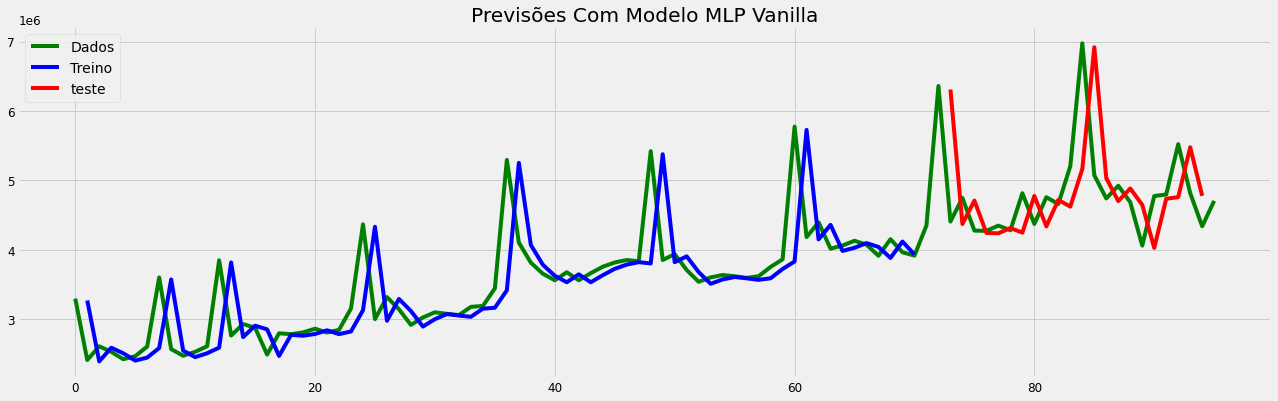

In [15]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

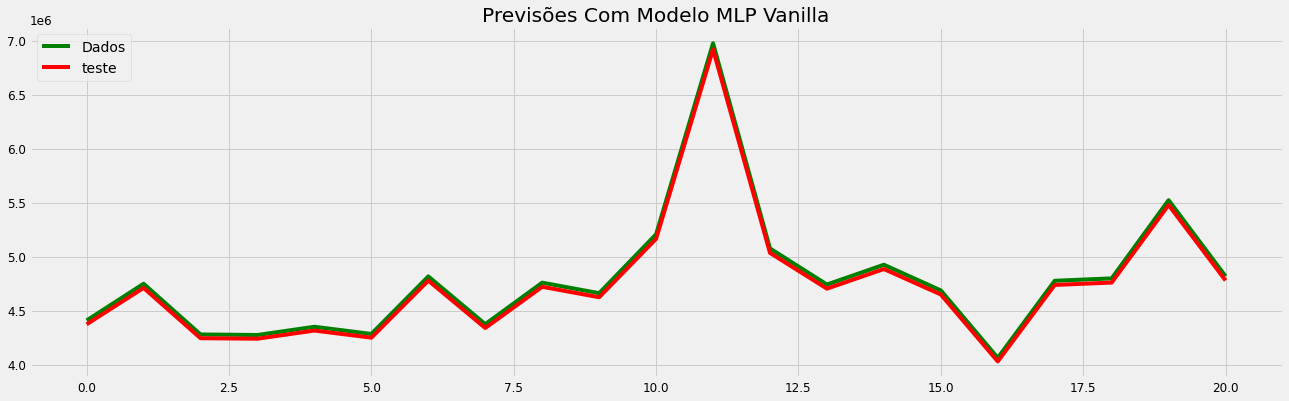

In [16]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

## Prevendo Séries Temporais com Multilayer Perceptron e Usando Método Window

Podemos também tentar resolver o problema de modo que várias etapas de tempo recente possam ser usadas para a previsão do próximo passo. Isso é chamado de método de janela (Window) e o tamanho da janela é um parâmetro que pode ser sintonizado para cada problema. Por exemplo, dado o tempo atual (t) nós queremos prever o valor na próxima vez na sequência (t + 1), podemos usar o tempo atual (T) bem como os dois tempos anteriores (t-1 e t-2). Quando formulado como um problema de regressão, as variáveis de entrada são t-2, t-1, t e a variável de saída é t + 1.

In [17]:
# Carregando o dataset

dataframe = pandas.read_csv("Arrecadacao_icms.csv", usecols = [1], engine = 'python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [18]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

72 24


In [19]:
# Reshape em X = t e Y = t + 1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# Modelo MLP
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 8863190002346.6660
Epoch 2/200
 - 0s - loss: 6026304554859.5947
Epoch 3/200
 - 0s - loss: 3854237992336.6953
Epoch 4/200
 - 0s - loss: 2293135301350.0288
Epoch 5/200
 - 0s - loss: 1275981152493.4492
Epoch 6/200
 - 0s - loss: 702215586059.1305
Epoch 7/200
 - 0s - loss: 433941577193.7391
Epoch 8/200
 - 0s - loss: 330817736985.9710
Epoch 9/200
 - 0s - loss: 298011715730.5507
Epoch 10/200
 - 0s - loss: 288602052882.5507
Epoch 11/200
 - 0s - loss: 285305785388.5218
Epoch 12/200
 - 0s - loss: 284753352760.3188
Epoch 13/200
 - 0s - loss: 283375444308.8696
Epoch 14/200
 - 0s - loss: 288044682963.4782
Epoch 15/200
 - 0s - loss: 283144566600.3478
Epoch 16/200
 - 0s - loss: 283004971497.7391
Epoch 17/200
 - 0s - loss: 281834185746.5507
Epoch 18/200
 - 0s - loss: 286075038058.4348
Epoch 19/200
 - 0s - loss: 281424088646.4927
Epoch 20/200
 - 0s - loss: 281940115749.1014
Epoch 21/200
 - 0s - loss: 280598654398.1449
Epoch 22/200
 - 0s - loss: 281463433679.7681
Epoch 23/200
 

Epoch 182/200
 - 0s - loss: 237564208242.0870
Epoch 183/200
 - 0s - loss: 235455092110.8406
Epoch 184/200
 - 0s - loss: 234781803608.1159
Epoch 185/200
 - 0s - loss: 235280711676.2899
Epoch 186/200
 - 0s - loss: 234200896064.9276
Epoch 187/200
 - 0s - loss: 236314978600.8116
Epoch 188/200
 - 0s - loss: 235101078444.5217
Epoch 189/200
 - 0s - loss: 235267736316.2899
Epoch 190/200
 - 0s - loss: 235141743161.5073
Epoch 191/200
 - 0s - loss: 233029813303.6522
Epoch 192/200
 - 0s - loss: 235203035462.4927
Epoch 193/200
 - 0s - loss: 236444056214.9565
Epoch 194/200
 - 0s - loss: 232297327126.2609
Epoch 195/200
 - 0s - loss: 233902146175.0724
Epoch 196/200
 - 0s - loss: 233842424639.0724
Epoch 197/200
 - 0s - loss: 232291178572.7536
Epoch 198/200
 - 0s - loss: 234599759634.5507
Epoch 199/200
 - 0s - loss: 234645048794.6667
Epoch 200/200
 - 0s - loss: 236755155185.1594


In [21]:
# Performance do Modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 230684038960.2319 MSE (480295.7828 RMSE)
Score em Teste: 366912569344.0000 MSE (605733.0842 RMSE)


In [22]:
# Previsões para treino e teste
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [23]:
# Ajustando as previsões de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajustando as previsões de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

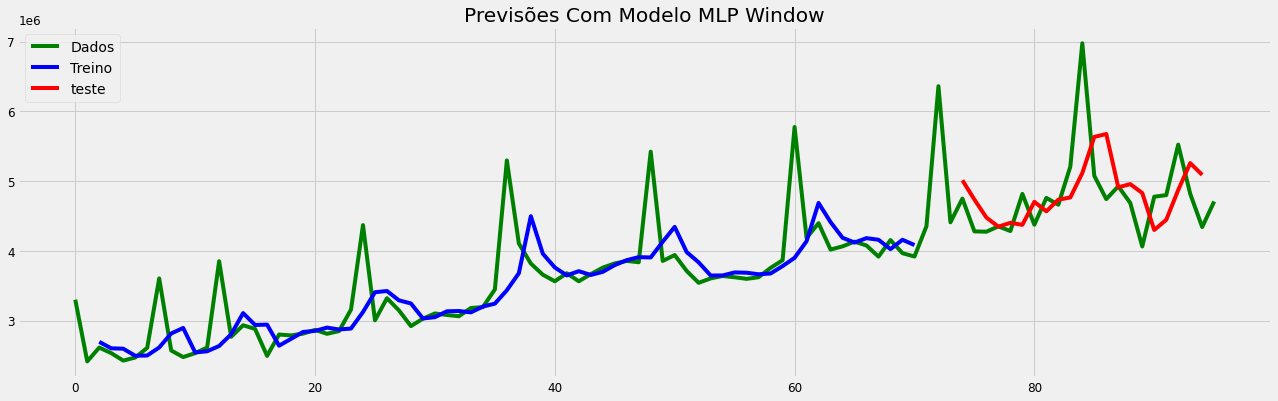

In [24]:
# Plot do baseline e previsões
# Podemos ver que o erro foi reduzido em comparação com o da seção anterior. 
# O tamanho da janela e a arquitetura da rede não foram sintonizados, isso é apenas uma demonstração de como
# enquadrar um problema de previsão em séries temporais. 
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

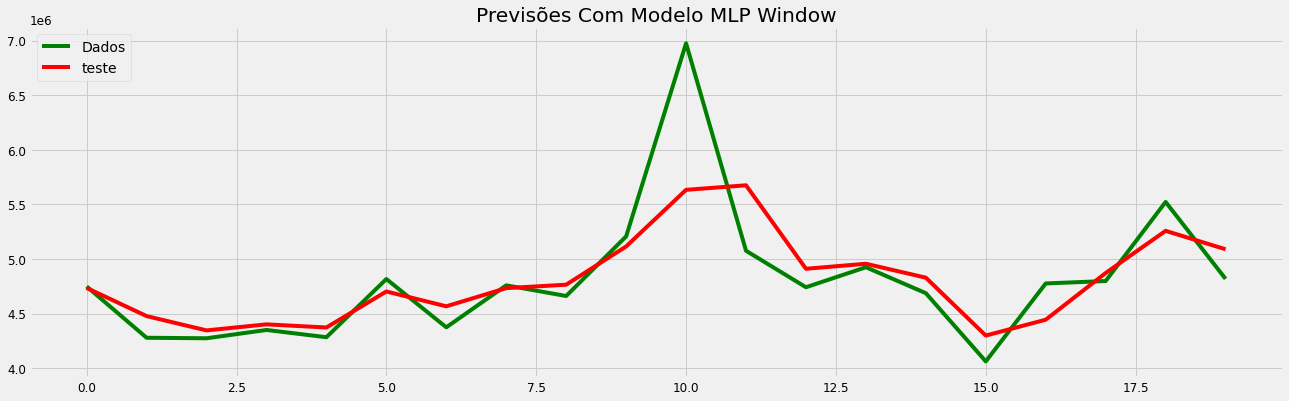

In [25]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(test[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim